# Salary Prediction:-

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset:-

In [3]:
data=pd.read_csv('Salaries_Project.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
data.shape

(397, 6)

In [5]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [6]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Data Cleaning:-

In [7]:
# Checking for null values:-

data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

So, no null values are there in the dataset.

In [8]:
data.columns.values

array(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'], dtype=object)

In [9]:
from scipy.stats import zscore

In [10]:
data.salary.sort_values(ascending=False)

43     231545
364    205500
249    204000
271    194800
77     193000
        ...  
317     67559
226     63900
237     63100
123     62884
282     57800
Name: salary, Length: 397, dtype: int64

In [11]:
data.sex.sort_values()

114    Female
316    Female
237    Female
179    Female
90     Female
        ...  
139      Male
138      Male
137      Male
146      Male
396      Male
Name: sex, Length: 397, dtype: object

In [12]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

Here, we can observe that rank, discipline and sex is of object type(categorical), so we have to convert these parameters
into integer type.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [14]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [ ]:
# Data Wrangling

In [15]:
rank=data.groupby("rank").mean()

In [16]:
rank

,yrs.since.phd,yrs.service,salary
rank,,,
AssocProf,15.453125,11.953125,93876.437500
AsstProf,5.104478,2.373134,80775.985075
Prof,28.300752,22.815789,126772.109023


In [17]:
data['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [18]:
rank_d={'Prof':3,'AssocProf':2,'AsstProf':1}
updated_data=data.copy()
updated_data['rank']=updated_data['rank'].map(rank_d)
updated_rank=updated_data.groupby('rank').mean()
updated_rank

,yrs.since.phd,yrs.service,salary
rank,,,
1,5.104478,2.373134,80775.985075
2,15.453125,11.953125,93876.437500
3,28.300752,22.815789,126772.109023


In [19]:
data['discipline'].unique()

array(['B', 'A'], dtype=object)

In [20]:
discipline=data.groupby('discipline').mean()
discipline

,yrs.since.phd,yrs.service,salary
discipline,,,
A,25.381215,19.950276,108548.430939
B,19.745370,15.657407,118028.694444


In [21]:
discipline_d={'A':1,'B':2}
updated_data['discipline']=updated_data['discipline'].map(discipline_d)
updated_discipline=updated_data.groupby('discipline').mean()
updated_discipline

,rank,yrs.since.phd,yrs.service,salary
discipline,,,,
1,2.591160,25.381215,19.950276,108548.430939
2,2.425926,19.745370,15.657407,118028.694444


In [22]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
sex=data.groupby('sex').mean()
sex

,yrs.since.phd,yrs.service,salary
sex,,,
Female,16.512821,11.564103,101002.410256
Male,22.946927,18.273743,115090.418994


In [24]:
sex_d={'Female':1,'Male':2}
updated_data['sex']=updated_data['sex'].map(sex_d)
updated_sex=updated_data.groupby('sex').mean()
updated_sex

,rank,discipline,yrs.since.phd,yrs.service,salary
sex,,,,,
1,2.179487,1.538462,16.512821,11.564103,101002.410256
2,2.536313,1.544693,22.946927,18.273743,115090.418994


So, all three object type column get converted into integer type.

In [25]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int64
 1   discipline     397 non-null    int64
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int64
 5   salary         397 non-null    int64
dtypes: int64(6)
memory usage: 18.7 KB


In [26]:
updated_data.dtypes

rank             int64
discipline       int64
yrs.since.phd    int64
yrs.service      int64
sex              int64
salary           int64
dtype: object

In [27]:
updated_data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,3,2,19,18,2,139750
1,3,2,20,16,2,173200
2,1,2,4,3,2,79750
3,3,2,45,39,2,115000
4,3,2,40,41,2,141500
...,...,...,...,...,...,...
392,3,1,33,30,2,103106
393,3,1,31,19,2,150564
394,3,1,42,25,2,101738
395,3,1,25,15,2,95329


In [28]:
updated_data.shape

(397, 6)

In [29]:
updated_data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

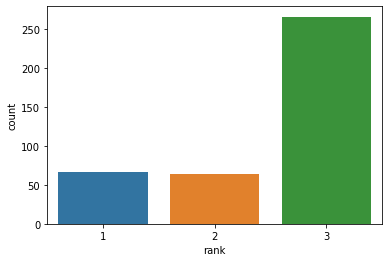

3    266
1     67
2     64
Name: rank, dtype: int64


In [30]:
# Visualization:-

ax=sns.countplot(x='rank',data=updated_data)
ax
plt.show()
print(updated_data['rank'].value_counts())

Above data shows that Assistant Professors are: 67
                      , Associate Professors are: 64
                      and Professors are:266        

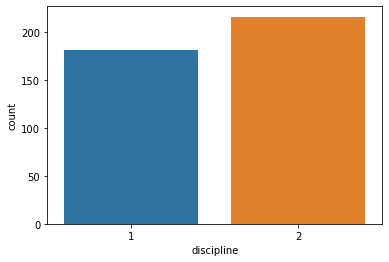

2    216
1    181
Name: discipline, dtype: int64


In [31]:
ax=sns.countplot(x='discipline',data=updated_data)
ax
plt.show()
print(updated_data['discipline'].value_counts())

Above data shows that total no.of discipline(A):181
                     and total no.of discipline(B):216

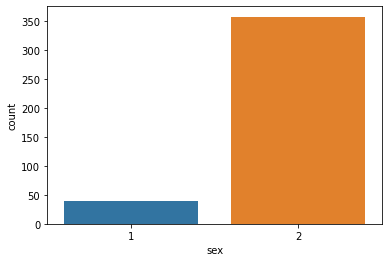

2    358
1     39
Name: sex, dtype: int64


In [32]:
ax=sns.countplot(x='sex',data=updated_data)
ax
plt.show()
print(updated_data['sex'].value_counts())

Above data shows that total no. of males: 358
                      and total no. of females: 39

# Correlation:-

In [33]:
# Checking the Correlation with respect to target variable(salary);-

updated_data.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.617224
salary           1.000000
Name: salary, dtype: float64

The Above observation shows a good correlation with respect to the target variable in which 
rank,yrs.since.phd and yrs.service are highly correlated.

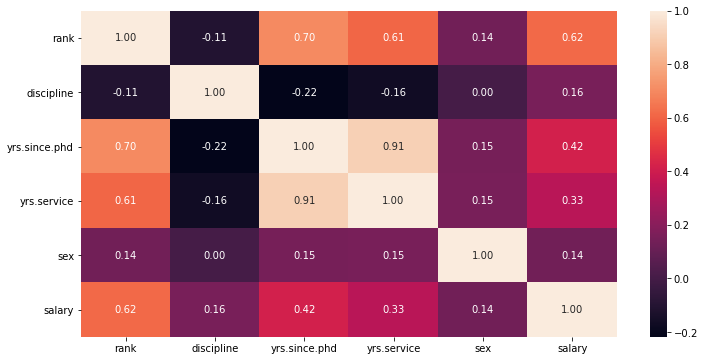

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(updated_data.corr(),annot=True,fmt='0.2f')
plt.show()

# Checking for the Skewness:-

In [35]:
updated_data.skew()

rank            -1.132759
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Above observations shows that 'rank' and 'sex' are highley skewed among others.

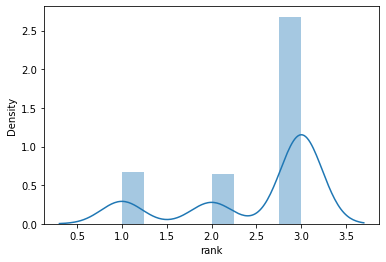

In [36]:
# checking with the distribution curve:-

sns.distplot(updated_data['rank'])
plt.show()

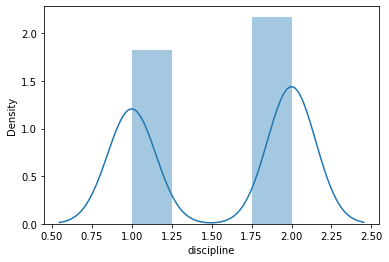

In [37]:
sns.distplot(updated_data['discipline'])
plt.show()

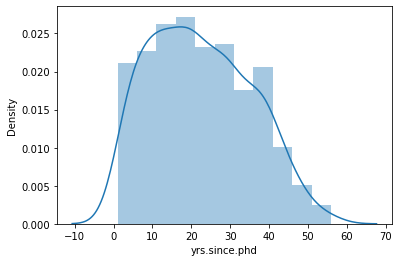

In [38]:
sns.distplot(updated_data['yrs.since.phd'])
plt.show()

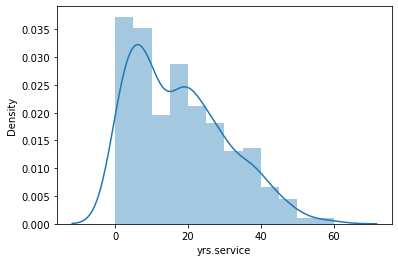

In [39]:
sns.distplot(updated_data['yrs.service'])
plt.show()

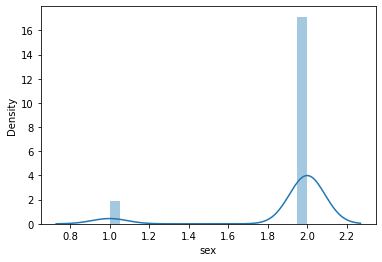

In [40]:
sns.distplot(updated_data['sex'])
plt.show()

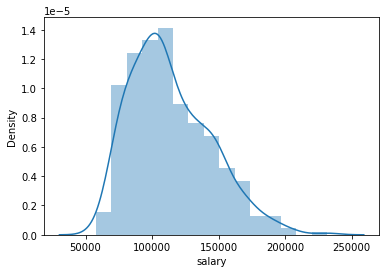

In [41]:
sns.distplot(updated_data['salary'])
plt.show()

Above visualization shows that all the columns are skewed, some are little skewed and some are highly skewed.
The Data is not normalised. the building blocks is out of normalised curve.

# Outliers Removal:-

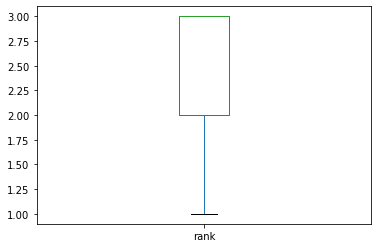

In [42]:
# checking the outliers with visualization:-

updated_data['rank'].plot.box()
plt.show()

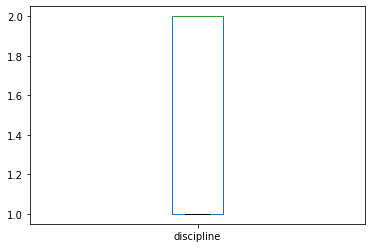

In [43]:
updated_data['discipline'].plot.box()
plt.show()

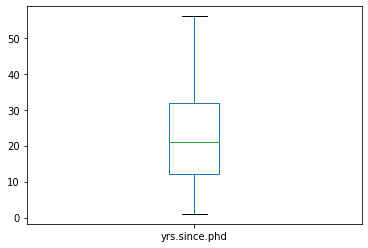

In [44]:
updated_data['yrs.since.phd'].plot.box()
plt.show()

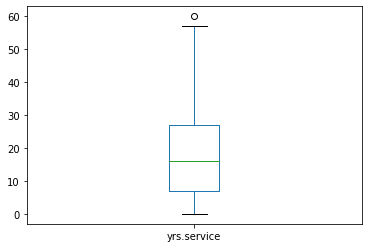

In [45]:
updated_data['yrs.service'].plot.box()
plt.show()

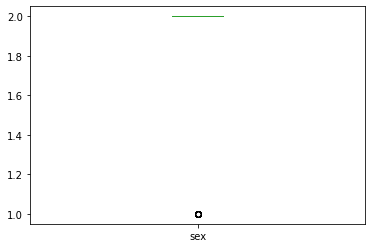

In [46]:
updated_data['sex'].plot.box()
plt.show()

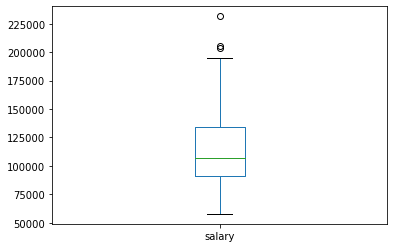

In [47]:
updated_data['salary'].plot.box()
plt.show()

In [48]:
from scipy.stats import zscore
z=np.abs(zscore(updated_data))
z

array([[0.65066837, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.65066837, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [1.95857752, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.65066837, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.65066837, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [1.95857752, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [49]:
# index no.

np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [50]:
z[9][4]

3.0297668523315746

In [51]:
z[364][5]

3.034410248101501

In [52]:
updated_new=updated_data[(z<3).all(axis=1)]
updated_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,3,2,19,18,2,139750
1,3,2,20,16,2,173200
2,1,2,4,3,2,79750
3,3,2,45,39,2,115000
4,3,2,40,41,2,141500
...,...,...,...,...,...,...
392,3,1,33,30,2,103106
393,3,1,31,19,2,150564
394,3,1,42,25,2,101738
395,3,1,25,15,2,95329


In [53]:
updated_data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,2.501259,1.544081,22.314861,17.614610,1.901763,113706.458438
std,0.767472,0.498682,12.887003,13.006024,0.298010,30289.038695
min,1.000000,1.000000,1.000000,0.000000,1.000000,57800.000000
25%,2.000000,1.000000,12.000000,7.000000,2.000000,91000.000000
50%,3.000000,2.000000,21.000000,16.000000,2.000000,107300.000000
75%,3.000000,2.000000,32.000000,27.000000,2.000000,134185.000000
max,3.000000,2.000000,56.000000,60.000000,2.000000,231545.000000


In [54]:
updated_data.shape

(397, 6)

In [55]:
updated_new.shape

(354, 6)

In [56]:
# percentage data loss:-

loss_percent=(397-354)/(397*100)
print(loss_percent,'%')

0.0010831234256926951 %


In [57]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(updated_data,method='yeo-johnson')
X

array([[ 0.69269655,  0.91540317, -0.12729454,  0.25061906,  0.3300584 ,
         0.93169352],
       [ 0.69269655,  0.91540317, -0.04917821,  0.10511199,  0.3300584 ,
         1.6936509 ],
       [-1.67925898,  0.91540317, -1.62812069, -1.28803213,  0.3300584 ,
        -1.25423316],
       ...,
       [ 0.69269655, -1.09241483,  1.39552477,  0.69878852,  0.3300584 ,
        -0.26938799],
       [ 0.69269655, -1.09241483,  0.32017198,  0.02856739,  0.3300584 ,
        -0.52698208],
       [-1.67925898, -1.09241483, -1.13497737, -1.12348349,  0.3300584 ,
        -1.18781833]])

In [58]:
X.ndim

2

In [59]:
X.mean()

1.0089885825812506e-15

In [60]:
X.std()

1.0

In [61]:
# Independent Variable;

x=updated_new.iloc[:,0:-1]
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,3,2,19,18,2
1,3,2,20,16,2
2,1,2,4,3,2
3,3,2,45,39,2
4,3,2,40,41,2
...,...,...,...,...,...
392,3,1,33,30,2
393,3,1,31,19,2
394,3,1,42,25,2
395,3,1,25,15,2


In [65]:
# Target Variable;

y=updated_new.iloc[:,-1]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 354, dtype: int64

# Machine Learning Algorithms Training and Testing Process:-

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [66]:
# linear Regression;

lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state",{i},train_accuracy)
    print("At random state",{i},test_accuracy)
    print("\n")

At random state {0} 0.4333567233819555
At random state {0} 0.42969388785069695


At random state {1} 0.42962249455210166
At random state {1} 0.4308988928347466


At random state {2} 0.4287256496033154
At random state {2} 0.4673661293771877


At random state {3} 0.4327326988938268
At random state {3} 0.45085452691551964


At random state {4} 0.40866022249111955
At random state {4} 0.4967824663328191


At random state {5} 0.4360164813243871
At random state {5} 0.4356181628364758


At random state {6} 0.4152532072854941
At random state {6} 0.4915113037449509


At random state {7} 0.4415241727823378
At random state {7} 0.40017056253913585


At random state {8} 0.44850332265222703
At random state {8} 0.3852067794450579


At random state {9} 0.4503842559487582
At random state {9} 0.30762551475781796


At random state {10} 0.4293138206353836
At random state {10} 0.4571148923366307


At random state {11} 0.4324059775523771
At random state {11} 0.41860064627266313


At random state {12} 0.43528

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=61)

In [68]:
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.5781492215069708


In [69]:
# Cross Validation:-

train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(j,cv_score,cv_mean,train_accuracy,test_accuracy)
    print("\n")

2 [0.42418712 0.33066892] 0.37742802179078067 -0.5455220736834134 0.5781492215069708


3 [0.42275966 0.40781974 0.29797074] 0.37618338094457054 -0.5455220736834134 0.5781492215069708


4 [0.37363671 0.48559067 0.36024456 0.364981  ] 0.3961132386151227 -0.5455220736834134 0.5781492215069708


5 [0.36081251 0.50429352 0.40872907 0.23453949 0.38098076] 0.37787106986760943 -0.5455220736834134 0.5781492215069708


6 [0.28756403 0.51252187 0.41593665 0.4198949  0.29596681 0.38880281] 0.3867811781669632 -0.5455220736834134 0.5781492215069708


7 [0.39783092 0.4972304  0.40957    0.46096649 0.30137138 0.2989911
 0.41559491] 0.39736502788602684 -0.5455220736834134 0.5781492215069708


8 [0.40997445 0.44866644 0.48001334 0.4365159  0.40079733 0.34718134
 0.32338098 0.39790851] 0.4055547869396678 -0.5455220736834134 0.5781492215069708


9 [0.48704447 0.41257372 0.48078726 0.45501924 0.34985475 0.27630846
 0.30814147 0.28075409 0.40046724] 0.3834389657644546 -0.5455220736834134 0.5781492215069708


Since,cv_s and accuracys are almost same. so, we are heading with a good approach.

# Hyperparameter Tuning:-

In [70]:
# Regularization;

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [71]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [72]:
# final model training;

ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

40.462298779416194

In [73]:
# Ensemble technique:-

from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf= RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [74]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_r2)
rf2=r2_score(y_test,pred_decision)
print('R2_Score',rf2)
rfs=cross_val_score(rf,x,y,cv=5)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.8429905291591493
R2_Score 0.5241933882991812
Cross_Val_Score 84.29905291591493


In [ ]:
#So, we are getting our model accuracy and Cross-Validation-Score both as 
#84.3% which shows our model is performing 
#"good enough".

# Saving the model:-

In [75]:
import pickle
filename='Salary.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [76]:
loaded_model=pickle.load(open('Salary.pkl','rb'))

In [77]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],
                        index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
Predicted,85429.04,141060.82,123986.015,111295.75,113203.455,90662.22,80424.9,107659.62,120760.795,85277.75,...,117623.585,109036.165,132301.355,85653.55,106120.4,134073.075,113667.01,102371.66,124595.515,130087.205
Original,85429.04,141060.82,123986.015,111295.75,113203.455,90662.22,80424.9,107659.62,120760.795,85277.75,...,117623.585,109036.165,132301.355,85653.55,106120.4,134073.075,113667.01,102371.66,124595.515,130087.205


In [78]:
conclusion.transpose()

,Predicted,Original
0,85429.040,85429.040
1,141060.820,141060.820
2,123986.015,123986.015
3,111295.750,111295.750
4,113203.455,113203.455
...,...,...
66,134073.075,134073.075
67,113667.010,113667.010
68,102371.660,102371.660
69,124595.515,124595.515
